In [ ]:


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from src.supplyseer.experimental.exotic_supplychain.supplychaingraphs import SupplyChainNetwork, SupplyChainNode

### Physics-Inspired Supply Chain (PISC)

Potential Energy -> Stored Inventory
* Physics: objects at heigh have stored energy due to their position
* Supply Chain: 
  * High inventory levels are like stored potential energy
  * Assumption: like a ball wants to roll downhill -> inventory "wants" to flow from high to low stock levels
  * Creates a natural pressure to balance inventory across locations
<br>

Diffusion -> Natural Inventory Flow (balancing)
* Physics: heat/particles naturally move from high to low concentration
* Supply Chain:
  * Inventory naturally wants to spread out evenly across warehouses when there is no plan/constraint
  * If one warehouse has 100 items and a retail store has 10, there's a natural business pressure to move it to the store
  * Diffusion coefficient represents how quickly this happens
<br>

Magnetic Forces -> Demand Pull
* Physics: Magnets create attractive forces
* Supply Chain:
  * Customer demand acts like a magnetic force pulling inventory
  * Higher demand creates stronger pull on inventory
  * The force gets stronger as the destination's inventory gets lower (like magnetic field strength with distance)
<br>

Flow Rates & Capacity -> Transport Constraints
* Physics: Fluid flow through pipes has maximum rates
* Supply Chain:
  * Transport links have maximum daily shipping capacity
  * Like a pipe that can only handle so much flow
  * The max_flow_rate parameter represents truck/shipping capacity
<br>

Kinetic Energy -> Inventory Movement
* Physics: Energy of motion
* Supply Chain:
  * Represents actual movement of goods through the network
  * Higher when there's lots of shipping activity
  * Lower when the system reaches equilibrium
<br>

Conservation Laws -> Inventory Tracking
* Physics: Mass/energy cannot be created or destroyed
* Supply Chain:
  * Each item that leaves one location must either:
    * Arrive at another location
    * Be sold to a customer
    * Be counted as lost/damaged leading to a write-off
  * Total inventory only changes through external sales or replenishment
<br>



In [3]:
WAREHOUSES = ["A", "B", ]
STORES = np.arange(1, 15, 1).tolist()
N = 100
index = pd.date_range(start='2023-01-01', periods=N, freq='D')
nodes = {}
edges = {}

for wh in WAREHOUSES:
    forecasted_demand = np.random.poisson(np.random.poisson(12), size=N)
    # Example input data
    warehouse_df = pd.DataFrame({
        'stock_level': [1000] * N,
        'forecast_demand': forecasted_demand,
        'actual_sales': forecasted_demand - 1,
        'reorder_point': [450] * N,
        'target_stock': [700] * N,
        'replenishment_lead_time': [2] * N  # 2 days to receive new stock
    }, index=index)

    nodes["Warehouse "+wh] = SupplyChainNode("Warehouse "+wh, warehouse_df)

    for store in STORES:
        if wh == "A":
            if store in np.arange(1, 10, 1).tolist():
                store_name = "Store_"+str(store)
                wh_store_combination = ("Warehouse "+wh, store_name)
                forecasted_demand2 = np.random.poisson(np.random.poisson(12), size=N)

                retail_store_df = pd.DataFrame({
                'stock_level': [np.random.poisson(60)] * N,
                'forecast_demand': forecasted_demand2,
                'actual_sales': forecasted_demand2 - 1,
                'reorder_point': [20] * N,
                'target_stock': [35] * N,
                'replenishment_lead_time': [2] * N
                }, index=index)

                nodes[store_name] = SupplyChainNode(store_name, retail_store_df)
                edges[wh_store_combination] = {'potential': np.random.beta(2, 4), 'max_flow_rate': np.random.poisson(50)}
        
        if wh == "B":
            if store in np.arange(10, 13, 1).tolist():
                store_name = "Store_"+str(store)
                wh_store_combination = ("Warehouse "+wh, store_name)
                forecasted_demand2 = np.random.poisson(np.random.poisson(12), size=N)
                retail_store_df = pd.DataFrame({
                'stock_level': [np.random.poisson(70)] * N,
                'forecast_demand': forecasted_demand2,
                'actual_sales': forecasted_demand2 - 1,
                'reorder_point': [15] * N,
                'target_stock': [50] * N,
                'replenishment_lead_time': [2] * N
                }, index=index)

                nodes[store_name] = SupplyChainNode(store_name, retail_store_df)   
                edges[wh_store_combination] = {'potential': np.random.beta(2, 4), 'max_flow_rate': np.random.poisson(50)}

        if wh == "C":
            if store in np.arange(13, 15, 1).tolist():
                store_name = "Store_"+str(store)
                wh_store_combination = ("Warehouse "+wh, store_name)
                forecasted_demand2 = np.random.poisson(np.random.poisson(12), size=N)
                retail_store_df = pd.DataFrame({
                'stock_level': [np.random.poisson(50)] * N,
                'forecast_demand': forecasted_demand2,
                'actual_sales': forecasted_demand2 - 1,
                'reorder_point': [20] * N,
                'target_stock': [45] * N,
                'replenishment_lead_time': [2] * N
                }, index=index)

                nodes[store_name] = SupplyChainNode(store_name, retail_store_df)   
                edges[wh_store_combination] = {'potential': np.random.beta(2, 4), 'max_flow_rate': np.random.poisson(50)}      


Timestep 0: 2023-01-01 00:00:00

Timestep 1: 2023-01-02 00:00:00

Timestep 2: 2023-01-03 00:00:00
Store_1 placed order for 27.11 units, arriving in 2 days
  Current stock: 7.89, Projected stock: -22.11, Avg daily sales: 15.00
Store_2 placed order for 24.00 units, arriving in 2 days
  Current stock: 11.00, Projected stock: -7.00, Avg daily sales: 9.00
Store_3 placed order for 35.00 units, arriving in 2 days
  Current stock: 0.00, Projected stock: -37.00, Avg daily sales: 18.50
Store_4 placed order for 16.00 units, arriving in 2 days
  Current stock: 19.00, Projected stock: -5.00, Avg daily sales: 12.00
Store_5 placed order for 33.73 units, arriving in 2 days
  Current stock: 1.27, Projected stock: -26.73, Avg daily sales: 14.00
Store_6 placed order for 8.00 units, arriving in 2 days
  Current stock: 27.00, Projected stock: 12.00, Avg daily sales: 7.50
Store_8 placed order for 28.00 units, arriving in 2 days
  Current stock: 7.00, Projected stock: -16.00, Avg daily sales: 11.50
Store_9 

D:\my_py_packages\supplyseer\src\supplyseer\experimental\exotic_supplychain\supplychaingraphs.py:82: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '27.11153556524647' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  self.results.iloc[current_timestamp_idx, self.results.columns.get_loc('ordered_amount')] = order_amount
D:\my_py_packages\supplyseer\src\supplyseer\experimental\exotic_supplychain\supplychaingraphs.py:82: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '33.73085075375287' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  self.results.iloc[current_timestamp_idx, self.results.columns.get_loc('ordered_amount')] = order_amount


Store_1 placed order for 13.89 units, arriving in 2 days
  Current stock: 21.11, Projected stock: -9.89, Avg daily sales: 15.50
Store_3 placed order for -9.00 units, arriving in 2 days
  Current stock: 44.00, Projected stock: 8.00, Avg daily sales: 18.00
Store_4 placed order for 15.00 units, arriving in 2 days
  Current stock: 20.00, Projected stock: -4.00, Avg daily sales: 12.00
Store_5 placed order for 17.00 units, arriving in 2 days
  Current stock: 18.00, Projected stock: -4.00, Avg daily sales: 11.00
Store_6 placed order for 7.00 units, arriving in 2 days
  Current stock: 28.00, Projected stock: 7.00, Avg daily sales: 10.50
Store_7 placed order for 13.00 units, arriving in 2 days
  Current stock: 22.00, Projected stock: 8.00, Avg daily sales: 7.00
Store_10 placed order for 14.00 units, arriving in 2 days
  Current stock: 36.00, Projected stock: 3.00, Avg daily sales: 16.50
Store_11 placed order for 5.00 units, arriving in 2 days
  Current stock: 45.00, Projected stock: 11.00, Avg 

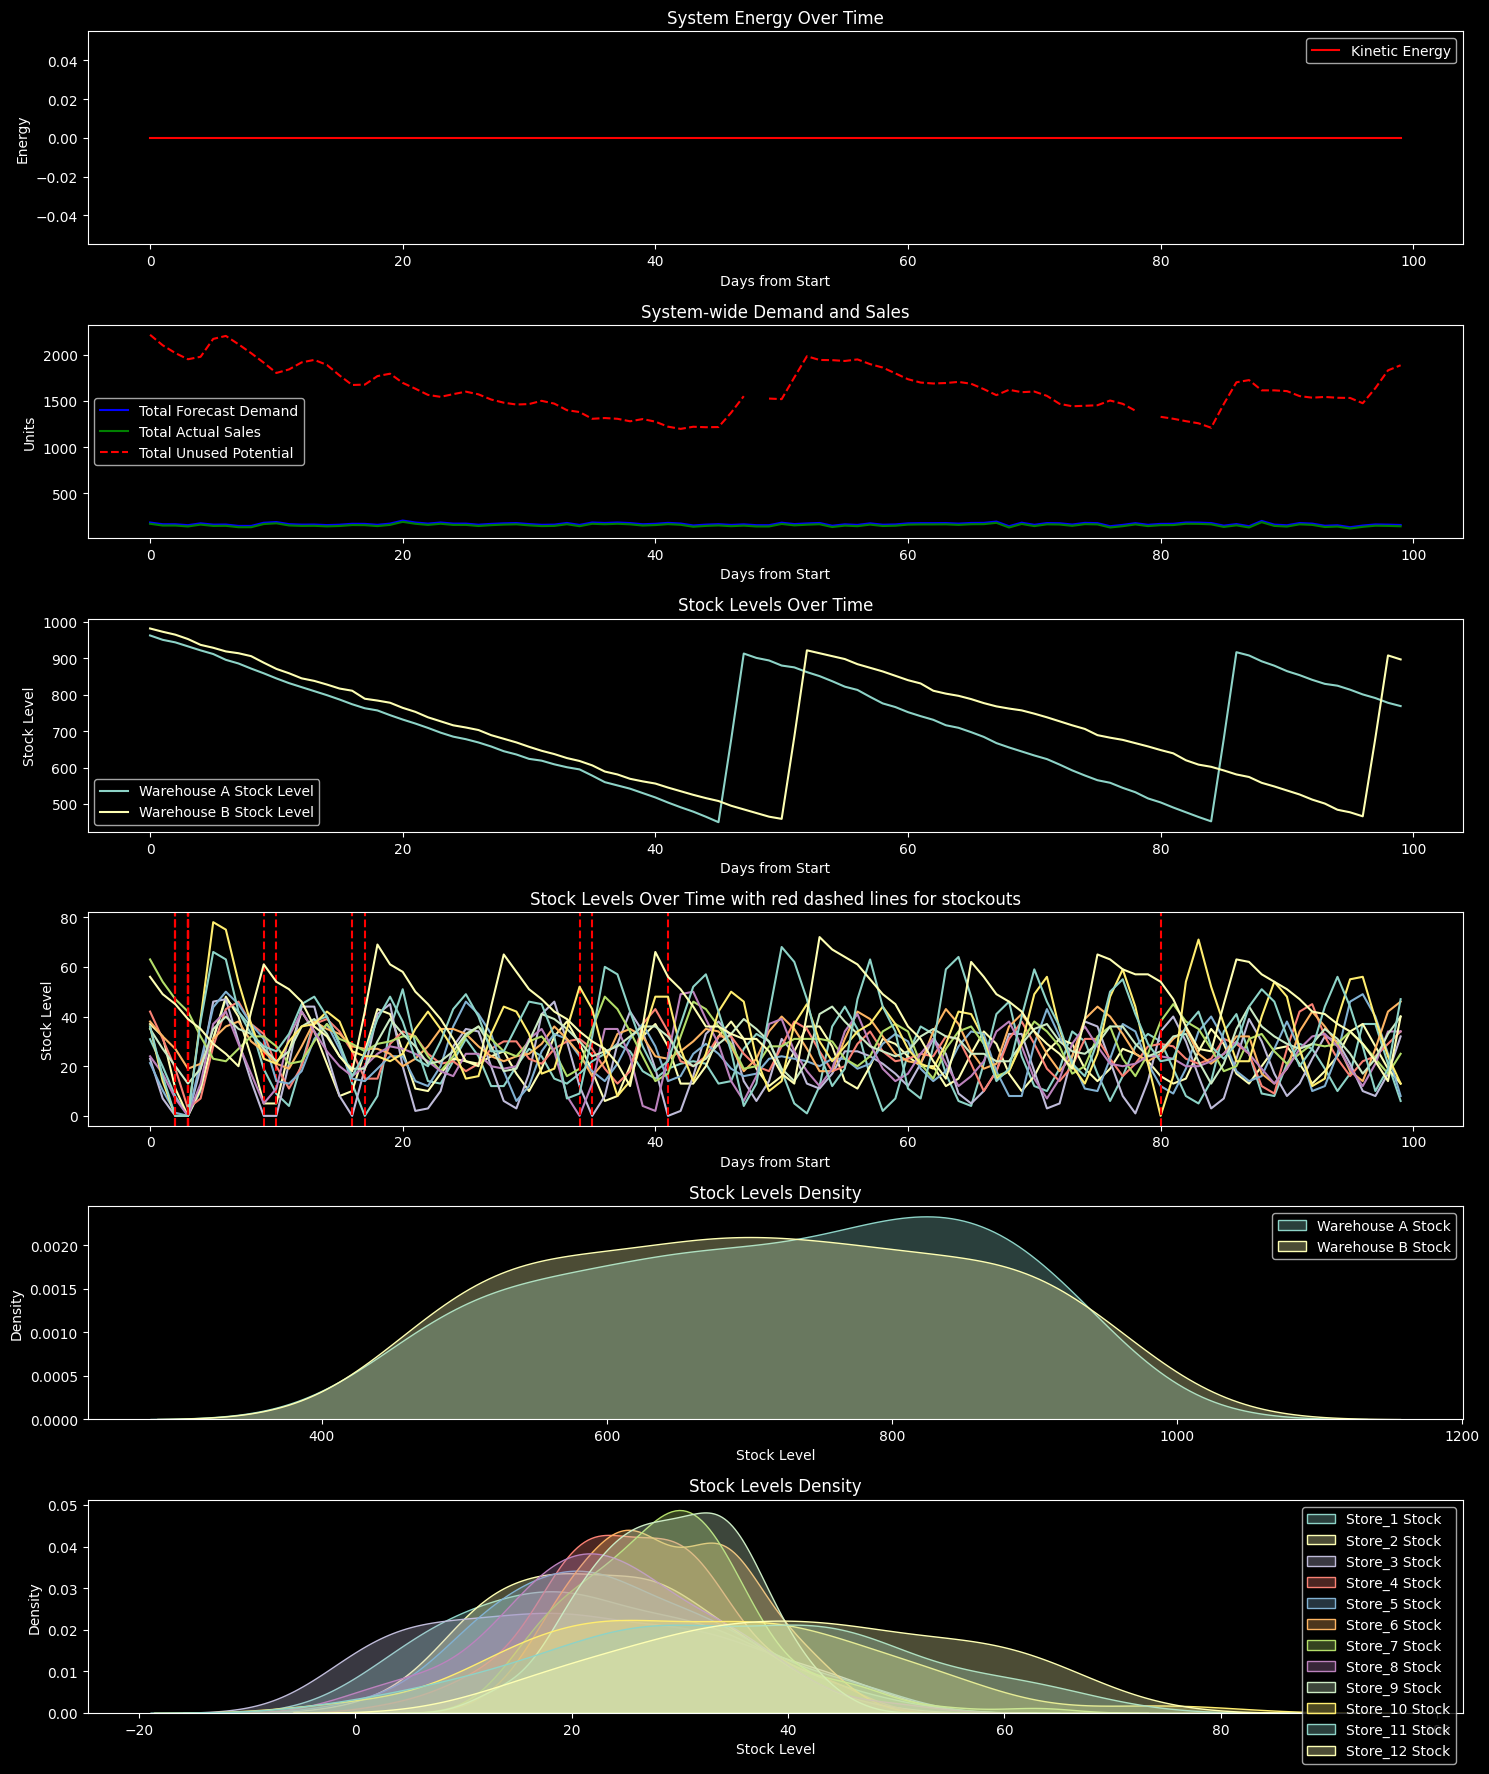

In [5]:
# Create and simulate network
plt.style.use("dark_background")
network = SupplyChainNetwork(nodes, edges)
network.simulate_flow()

In [6]:
network.get_filtered_metrics("Store_11")


,forecast_demand,actual_sales,unused_potential,total_stock,stockout,Store_11_stock,Store_11_forecast,Store_11_sales,Store_11_unused
2023-01-01,16,15,21,36,0,36,16,15,21
2023-01-02,21,20,0,16,0,16,21,20,0
2023-01-03,19,18,0,0,1,0,19,18,0
2023-01-04,17,16,0,0,1,0,17,16,0
2023-01-05,13,12,26.0,38.0,0,38.0,13,12,26.0
...,...,...,...,...,...,...,...,...,...
2023-04-06,13,12,32.0,44.0,0,44.0,13,12,32.0
2023-04-07,17,16,12.0,28.0,0,28.0,17,16,12.0
2023-04-08,19,18,0,10.0,0,10.0,19,18,0
2023-04-09,14,13,6.0,19.0,0,19.0,14,13,6.0


In [7]:
network.get_node_metrics("Warehouse A")["data"]

,stock_level,forecast_demand,actual_sales,unused_potential,potential_energy,ordered_amount,stockout
2023-01-01,962.842386,7,6,956.842386,481.421193,0.0,0
2023-01-02,950.842386,13,12,938.842386,475.421193,0.0,0
2023-01-03,943.842386,8,7,936.842386,471.921193,0.0,0
2023-01-04,932.842386,12,11,921.842386,466.421193,0.0,0
2023-01-05,921.842386,12,11,910.842386,460.921193,0.0,0
...,...,...,...,...,...,...,...
2023-04-06,813.842386,12,11,802.842386,406.921193,0.0,0
2023-04-07,800.842386,14,13,787.842386,400.421193,0.0,0
2023-04-08,790.842386,11,10,780.842386,395.421193,0.0,0
2023-04-09,777.842386,14,13,764.842386,388.921193,0.0,0



Timestep 0: 2023-01-01 00:00:00

Timestep 1: 2023-01-02 00:00:00

Timestep 2: 2023-01-03 00:00:00

Timestep 3: 2023-01-04 00:00:00
Store_1 received 57.00 units from diffusion flow
Store_2 received 16.49 units from diffusion flow
Store_3 received 40.00 units from diffusion flow
Store_4 received 14.80 units from diffusion flow
Store_5 received 56.00 units from diffusion flow
Store_6 received 10.65 units from diffusion flow
Store_8 received 61.00 units from diffusion flow
Store_9 received 26.10 units from diffusion flow
Store_10 received 62.00 units from diffusion flow
Store_11 received 44.00 units from diffusion flow
Store_12 received 1.12 units from diffusion flow

Timestep 4: 2023-01-05 00:00:00
Store_3 received 17.30 units from diffusion flow
Store_4 received 3.47 units from diffusion flow
Store_6 received 1.61 units from diffusion flow
Store_11 received 6.97 units from diffusion flow
Store_12 received 7.81 units from diffusion flow

Timestep 5: 2023-01-06 00:00:00
Store_2 received 4

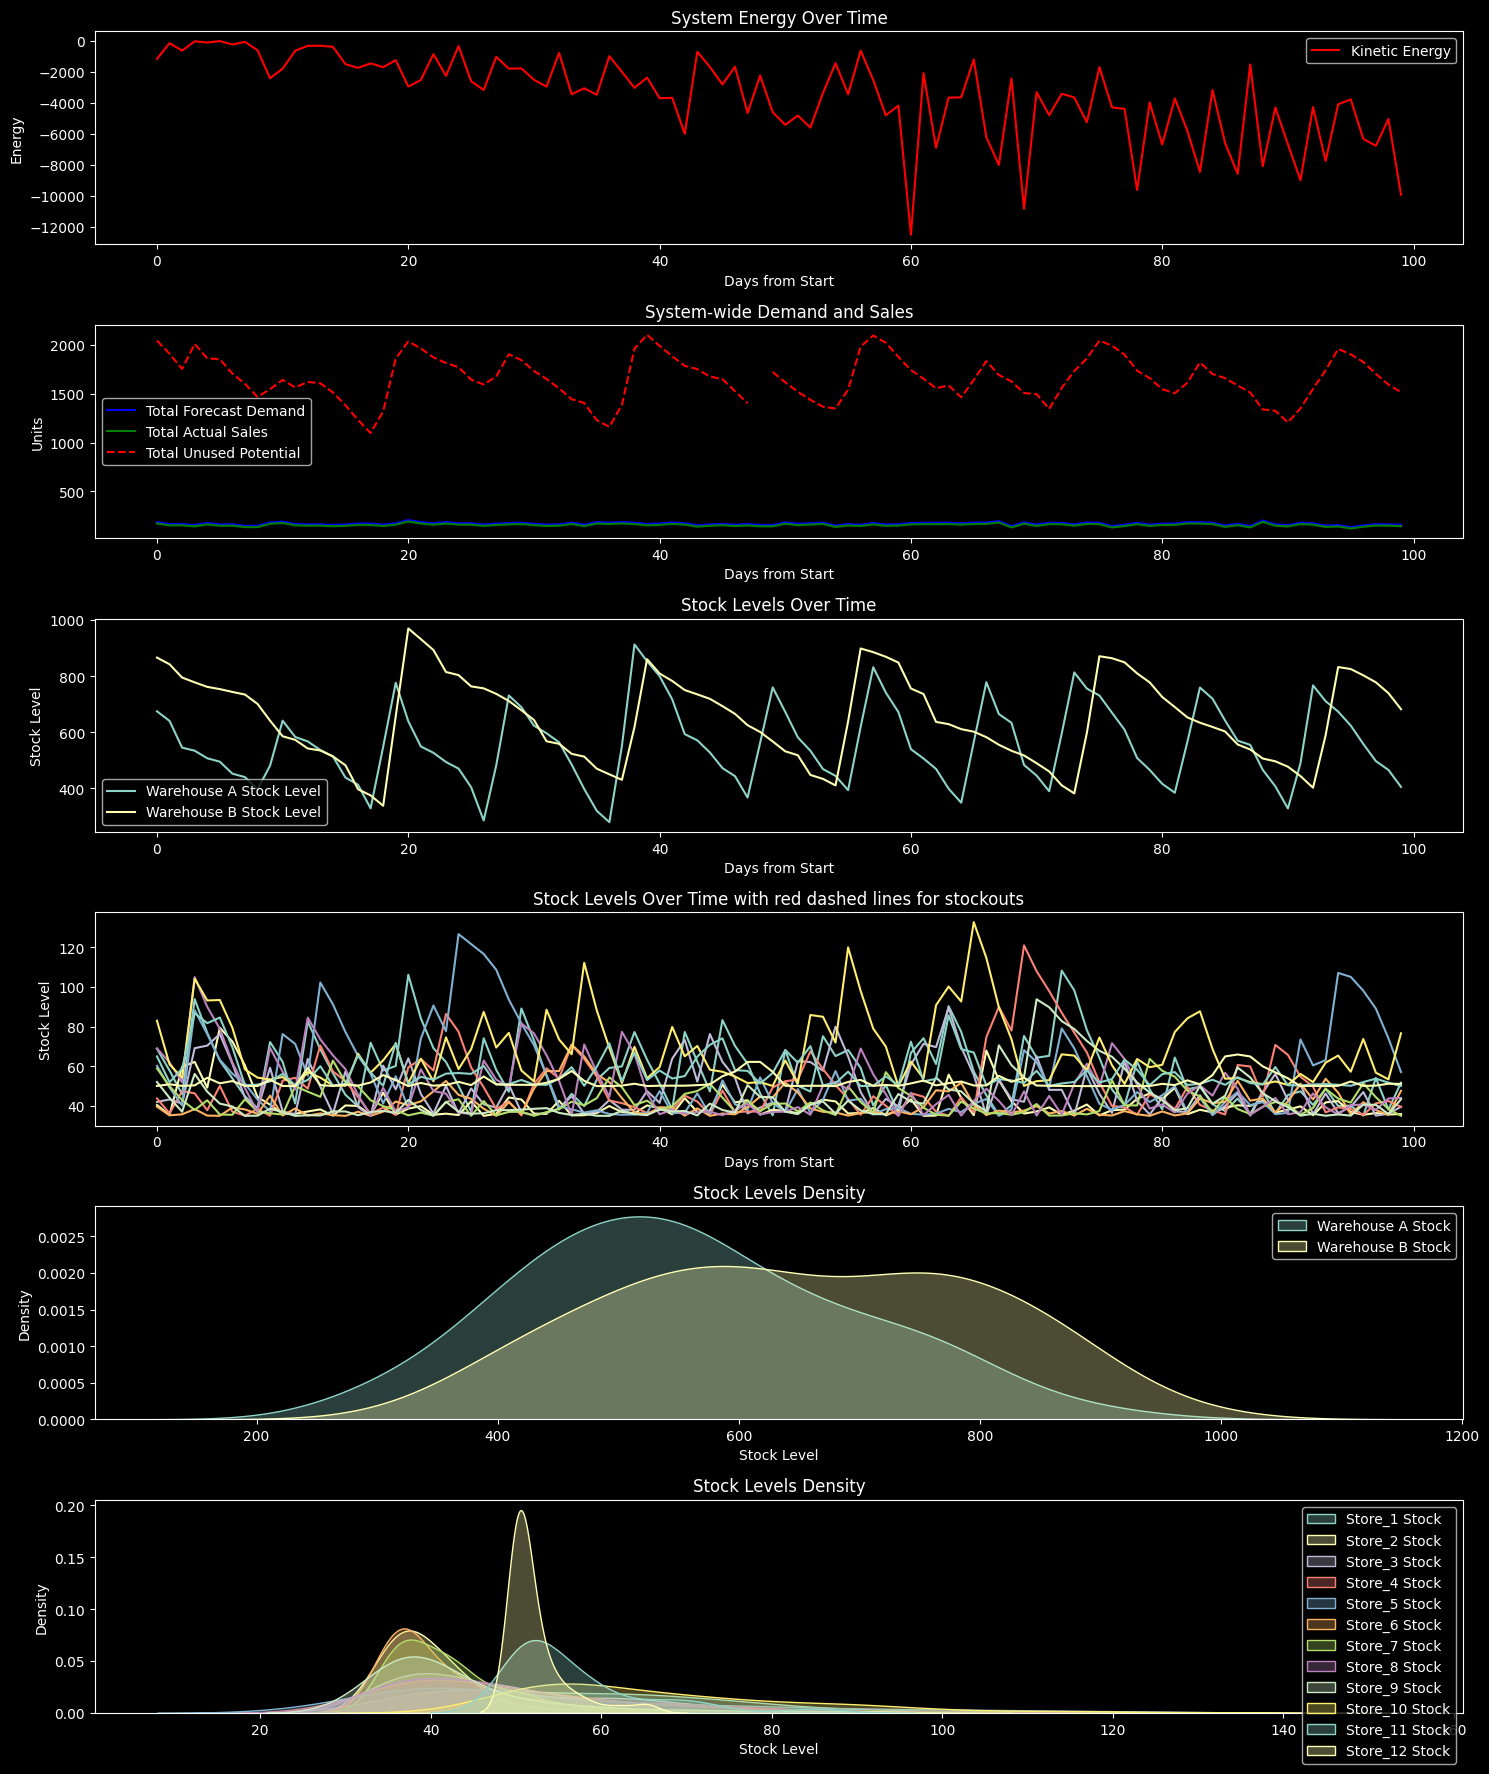

In [8]:
# Create and simulate network
network = SupplyChainNetwork(nodes, edges, flow_mode="diffusion")
network.simulate_flow()

In [7]:
network.get_filtered_metrics("Store_11").head(10)


,forecast_demand,actual_sales,unused_potential,total_stock,stockout,Store_11_stock,Store_11_forecast,Store_11_sales,Store_11_unused
2023-01-01,10,9,44.265221,53.265221,0,53.265221,10,9,44.265221
2023-01-02,14,13,42.880599,55.880599,0,55.880599,14,13,42.880599
2023-01-03,6,5,45.880599,50.880599,0,50.880599,6,5,45.880599
2023-01-04,9,8,43.443206,51.443206,0,51.443206,9,8,43.443206
2023-01-05,6,5,45.263768,50.263768,0,50.263768,6,5,45.263768
2023-01-06,12,11,43.092912,54.092912,0,54.092912,12,11,43.092912
2023-01-07,9,8,42.580772,50.580772,0,50.580772,9,8,42.580772
2023-01-08,8,7,43.815931,50.815931,0,50.815931,8,7,43.815931
2023-01-09,13,12,42.539094,54.539094,0,54.539094,13,12,42.539094
2023-01-10,12,11,40.643691,51.643691,0,51.643691,12,11,40.643691


In [8]:
network.get_node_metrics("Warehouse A")["data"]

,stock_level,forecast_demand,actual_sales,unused_potential,potential_energy,ordered_amount,stockout
2023-01-01,920.121502,11,10,910.121502,460.060751,0.0,0
2023-01-02,788.735254,11,10,778.735254,394.367627,0.0,0
2023-01-03,643.774239,12,11,632.774239,321.88712,0.0,0
2023-01-04,567.250787,11,10,557.250787,283.625394,0.0,0
2023-01-05,419.879307,19,18,401.879307,209.939654,0.0,0
...,...,...,...,...,...,...,...
2023-04-06,627.813458,7,6,621.813458,313.906729,0.0,0
2023-04-07,655.541862,17,16,639.541862,327.770931,0.0,0
2023-04-08,584.046769,19,18,566.046769,292.023385,0.0,0
2023-04-09,532.995057,16,15,517.995057,266.497529,0.0,0



Timestep 0: 2023-01-01 00:00:00

Timestep 1: 2023-01-02 00:00:00

Timestep 2: 2023-01-03 00:00:00

Timestep 3: 2023-01-04 00:00:00
Store_2 received 9.49 units from diffusion flow
Store_3 received 20.00 units from diffusion flow
Store_4 received 7.97 units from diffusion flow
Store_6 received 6.44 units from diffusion flow
Store_12 received 7.81 units from diffusion flow
Warehouse A placed order for 240.57 units, arriving in 2 days
  Current stock: 459.43, Projected stock: 440.43, Avg daily sales: 9.50

Timestep 4: 2023-01-05 00:00:00
Store_2 received 3.11 units from diffusion flow
Store_3 received 19.19 units from diffusion flow
Store_4 received 12.57 units from diffusion flow
Store_5 received 3.98 units from diffusion flow
Store_6 received 4.73 units from diffusion flow
Store_10 received 7.11 units from diffusion flow
Store_11 received 22.00 units from diffusion flow
Store_12 received 6.84 units from diffusion flow
Warehouse A placed order for 279.81 units, arriving in 2 days
  Curre

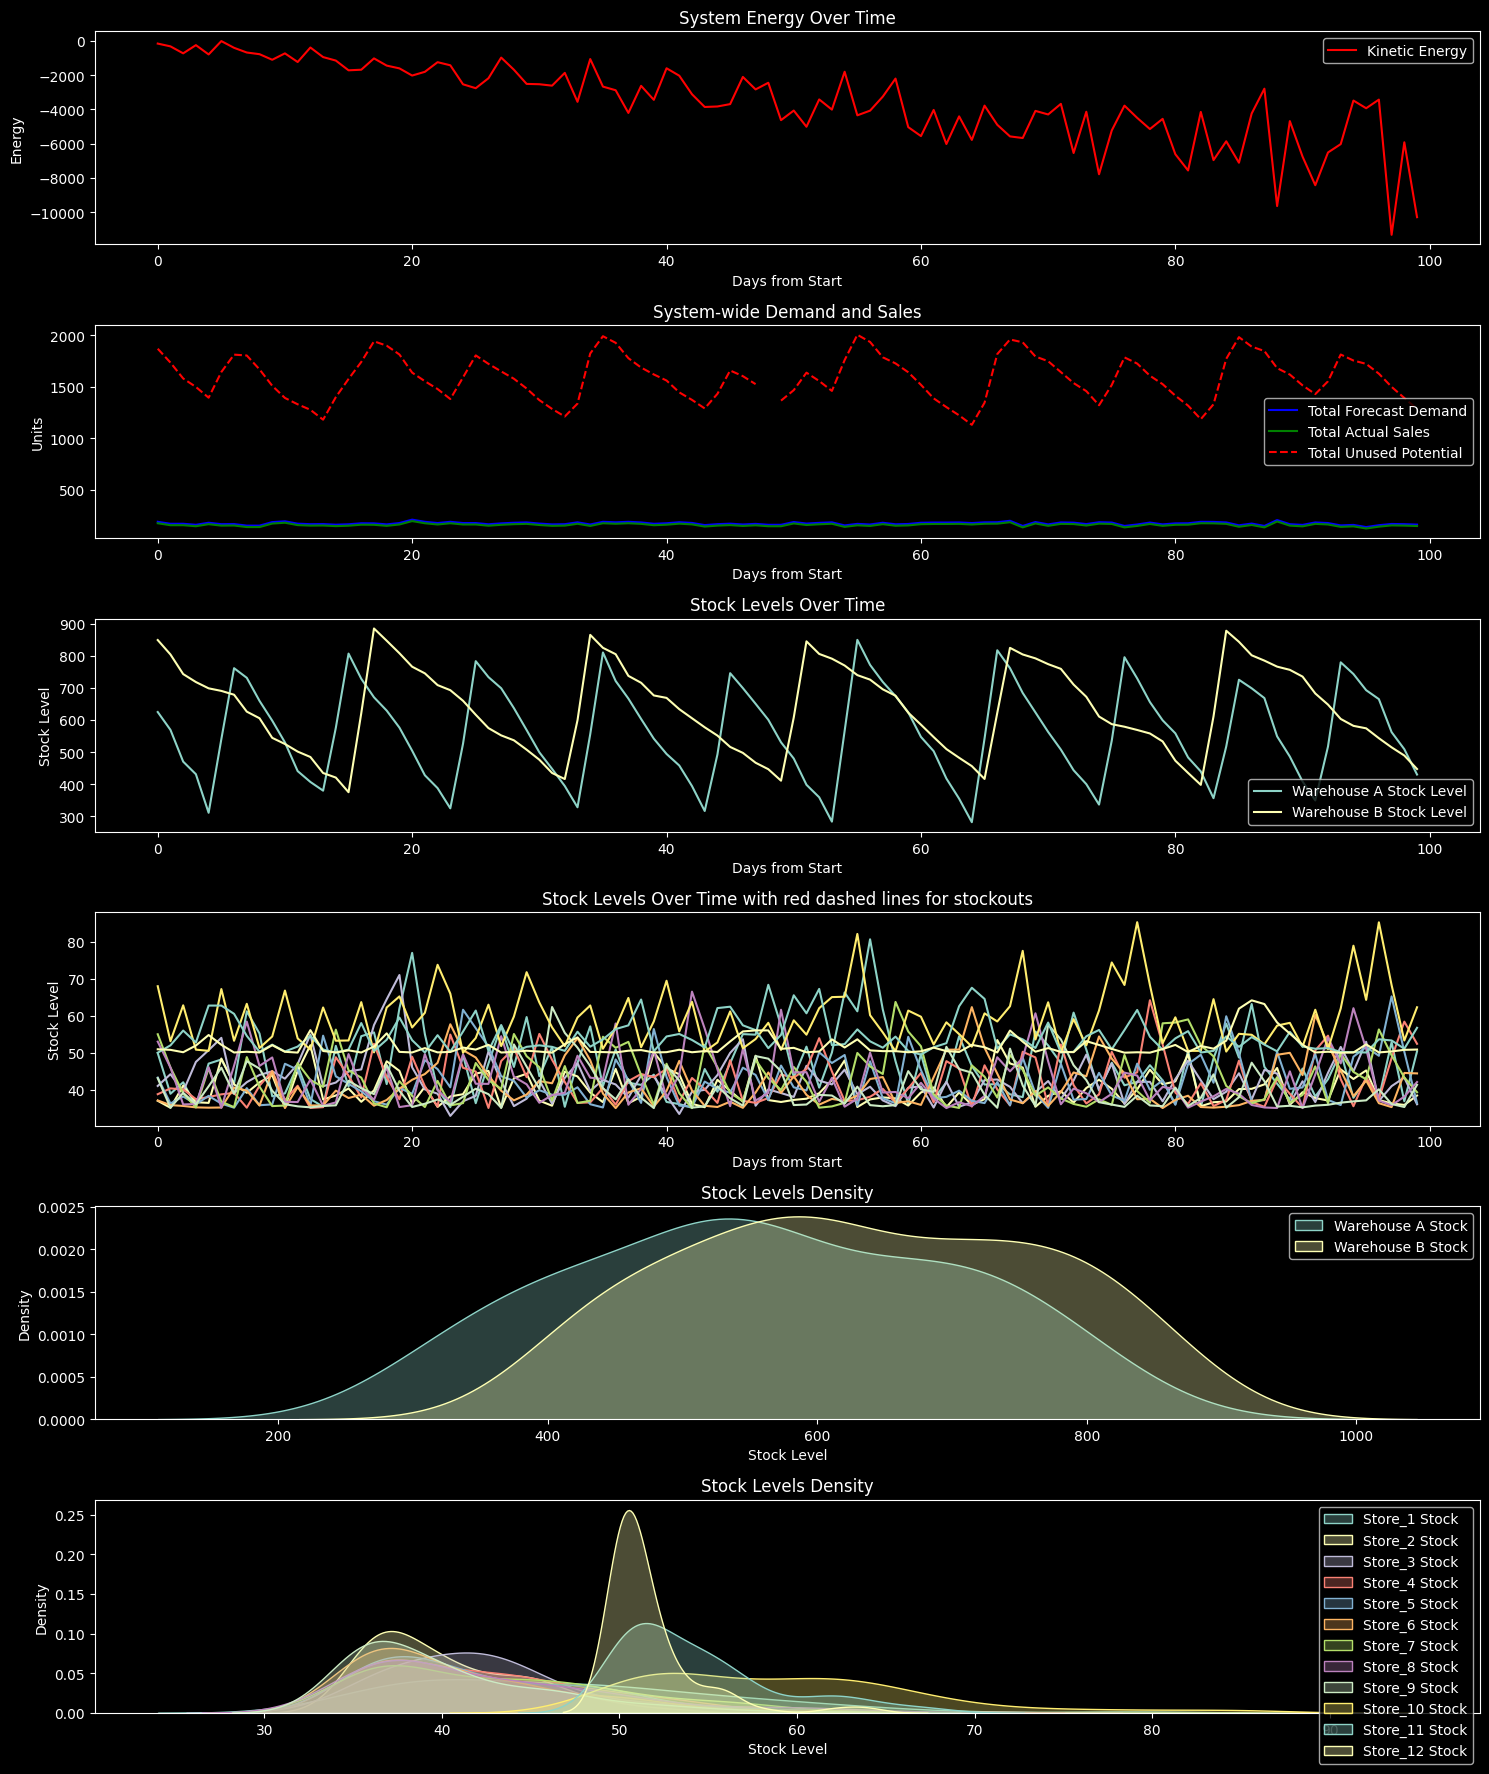

In [9]:
# Create and simulate network
network = SupplyChainNetwork(nodes, edges, flow_mode="hybrid")
network.simulate_flow()

In [10]:
network.get_filtered_metrics("Store_11").head(10)

,forecast_demand,actual_sales,unused_potential,total_stock,stockout,Store_11_stock,Store_11_forecast,Store_11_sales,Store_11_unused
2023-01-01,16,15,35.0,50.0,0,50.0,16,15,35.0
2023-01-02,21,20,32.0,52.0,0,52.0,21,20,32.0
2023-01-03,19,18,38.0,56.0,0,56.0,19,18,38.0
2023-01-04,17,16,36.761739,52.761739,0,52.761739,17,16,36.761739
2023-01-05,13,12,50.761739,62.761739,0,62.761739,13,12,50.761739
2023-01-06,23,22,40.761739,62.761739,0,62.761739,23,22,40.761739
2023-01-07,16,15,45.523477,60.523477,0,60.523477,16,15,45.523477
2023-01-08,22,21,33.552723,54.552723,0,54.552723,22,21,33.552723
2023-01-09,10,9,41.273141,50.273141,0,50.273141,10,9,41.273141
2023-01-10,14,13,39.178407,52.178407,0,52.178407,14,13,39.178407


In [11]:
network.get_node_metrics("Warehouse A")["data"]

,stock_level,forecast_demand,actual_sales,unused_potential,potential_energy,ordered_amount,stockout
2023-01-01,624.907148,7,6,618.907148,312.453574,0.000000,0
2023-01-02,569.318546,13,12,557.318546,284.659273,0.000000,0
2023-01-03,470.426542,8,7,463.426542,235.213271,0.000000,0
2023-01-04,431.189033,12,11,420.189033,215.594517,240.573458,0
2023-01-05,311.136521,12,11,300.136521,155.56826,279.810967,0
...,...,...,...,...,...,...,...
2023-04-06,692.92472,12,11,681.92472,346.46236,0.000000,0
2023-04-07,665.049749,14,13,652.049749,332.524875,0.000000,0
2023-04-08,562.313974,11,10,552.313974,281.156987,0.000000,0
2023-04-09,509.160707,14,13,496.160707,254.580353,0.000000,0


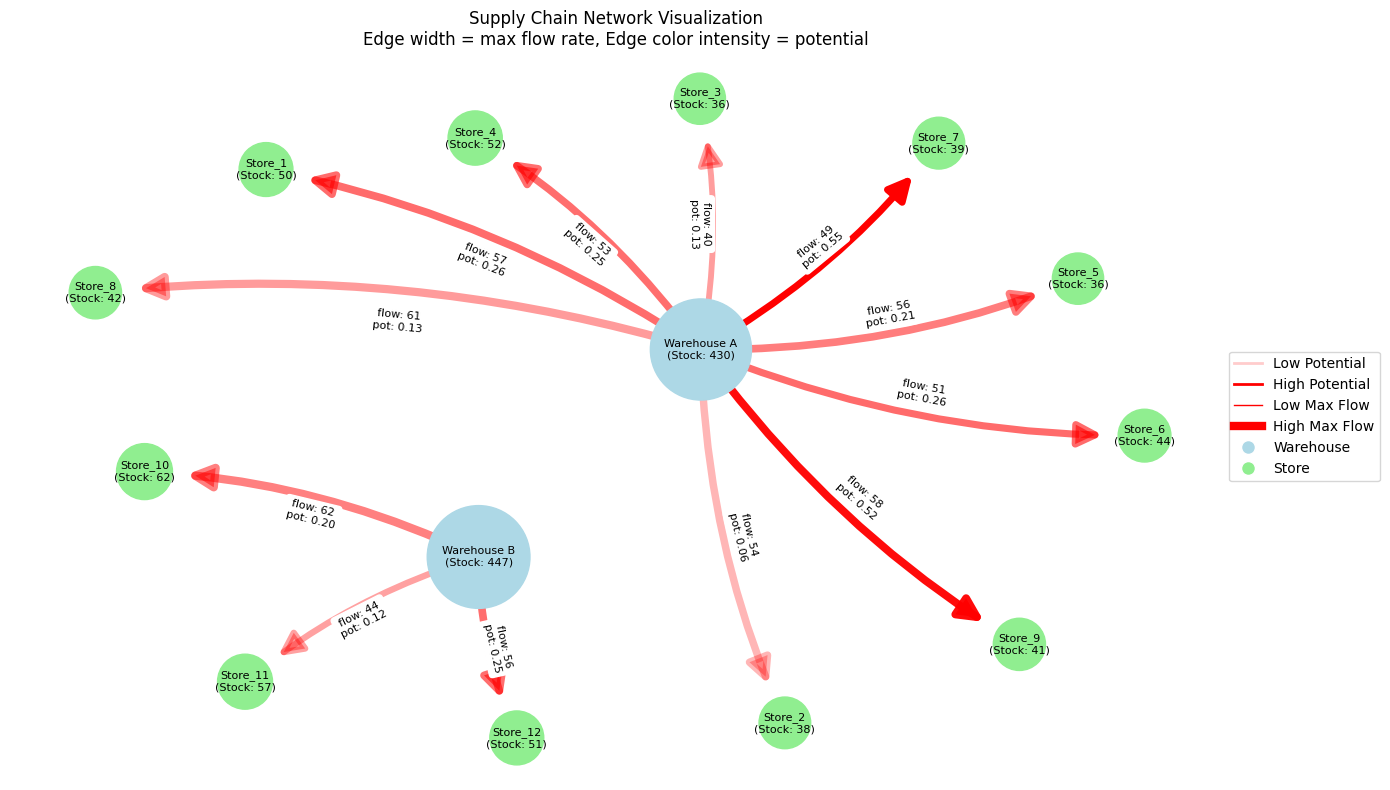

In [37]:
plt.style.use("default")
network.visualize_network()

In [12]:
store_df = network.get_filtered_metrics("Store_11")
store_df

,forecast_demand,actual_sales,unused_potential,total_stock,stockout,Store_11_stock,Store_11_forecast,Store_11_sales,Store_11_unused
2023-01-01,16,15,35.0,50.0,0,50.0,16,15,35.0
2023-01-02,21,20,32.0,52.0,0,52.0,21,20,32.0
2023-01-03,19,18,38.0,56.0,0,56.0,19,18,38.0
2023-01-04,17,16,36.761739,52.761739,0,52.761739,17,16,36.761739
2023-01-05,13,12,50.761739,62.761739,0,62.761739,13,12,50.761739
...,...,...,...,...,...,...,...,...,...
2023-04-06,13,12,38.055153,50.055153,0,50.055153,13,12,38.055153
2023-04-07,17,16,37.63489,53.63489,0,53.63489,17,16,37.63489
2023-04-08,19,18,35.315105,53.315105,0,53.315105,19,18,35.315105
2023-04-09,14,13,38.077267,51.077267,0,51.077267,14,13,38.077267


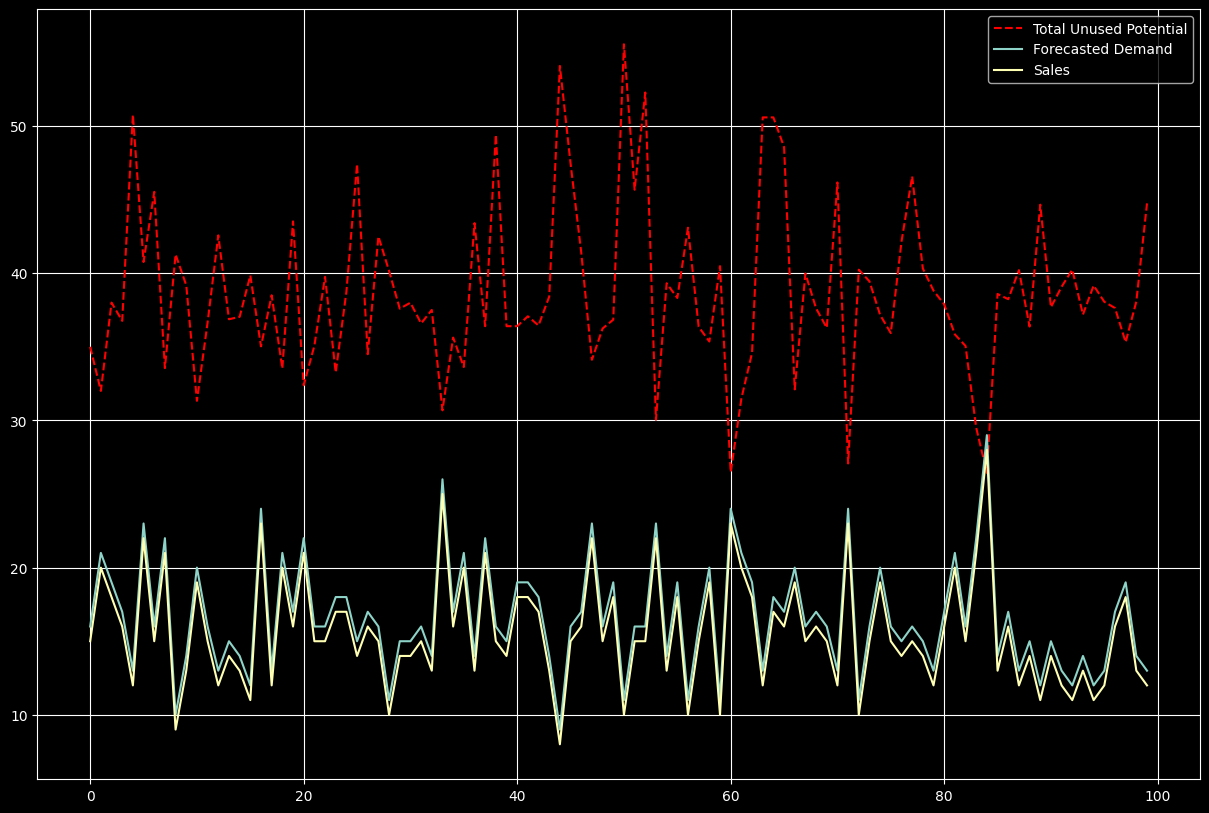

In [13]:
plt.figure(figsize=(15,10))

plt.plot(range(len(store_df)), store_df["unused_potential"], label="Total Unused Potential", linestyle="--", color="r")
plt.plot(range(len(store_df)), store_df["forecast_demand"], label="Forecasted Demand")
plt.plot(range(len(store_df)), store_df["actual_sales"], label="Sales")

plt.legend()
plt.grid(True)

In [14]:
import seaborn as sns

Text(0, 0.5, 'Unused Potential')

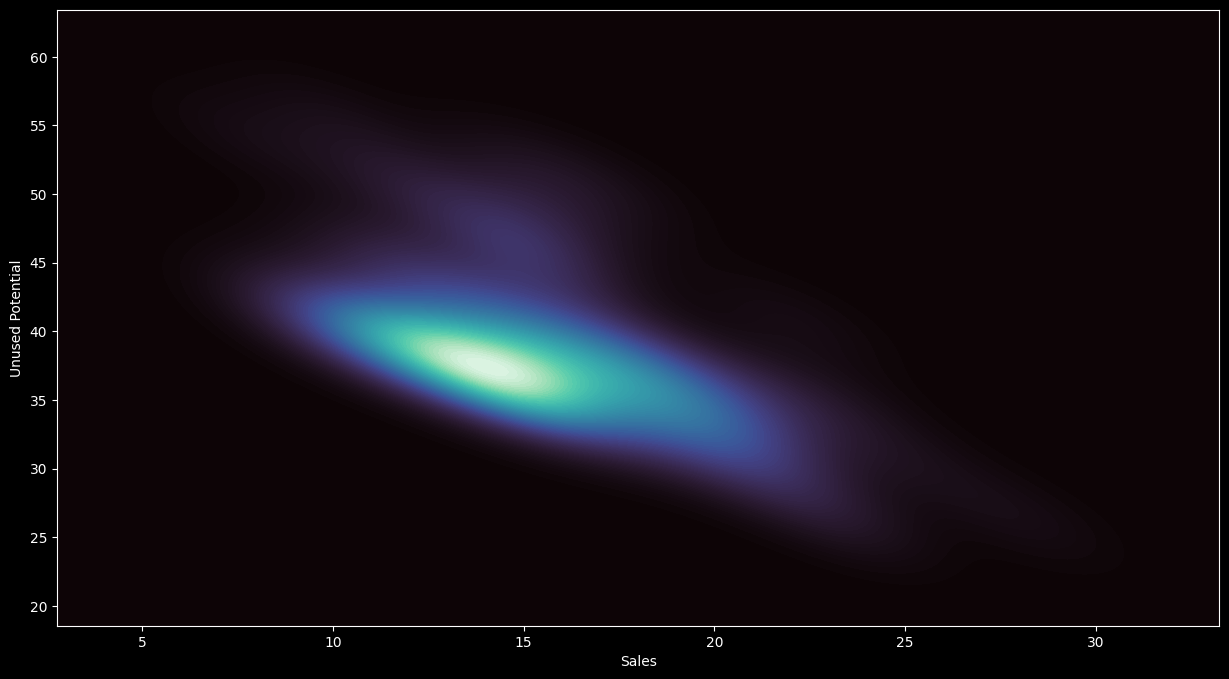

In [15]:
# sns.set(style="ticks", context="talk")
plt.style.use("dark_background")


plt.figure(figsize=(15, 8))

sns.kdeplot(data=store_df,
            x="actual_sales",
            y="unused_potential",
            fill=True, thresh=0, levels=100, cmap="mako")

plt.xlabel("Sales")
plt.ylabel("Unused Potential")